# MVP Predictions #

In [1]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
July 27 2021 7:37 PM - August 6 2021 2:08 AM
"""

'\nCreated by MinhKhang Nguyen\nJuly 27 2021 7:37 PM - August 6 2021 2:08 AM\n'

In [2]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_econtext = ssl._create_unverified_context

#### Importing Data ####

###### Importing Normal Stats ######

In [4]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
nba_tables = pd.read_html(html_url)
len(nba_tables)
nba = nba_tables[0]
nba.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,22,17,26.3,3.6,8.9,...,.528,2.2,5.9,8.1,1.5,0.5,0.5,1.1,2.5,8.4
1,2,Steven Adams,C,28,MEM,33,33,25.2,2.5,4.9,...,.621,3.9,5.0,8.9,2.7,0.9,0.5,1.6,1.6,6.8
2,3,Bam Adebayo,C,24,MIA,18,18,32.9,7.0,13.5,...,.759,2.7,7.4,10.2,3.2,1.1,0.3,2.9,3.3,18.7
3,4,Santi Aldama,PF,21,MEM,16,0,9.8,1.5,4.1,...,.583,1.0,1.6,2.6,0.8,0.1,0.2,0.3,1.1,3.6
4,5,LaMarcus Aldridge,C,36,BRK,25,8,23.6,6.0,10.4,...,.833,1.4,4.3,5.7,0.9,0.4,1.2,0.8,1.7,14.0
5,6,Nickeil Alexander-Walker,SG,23,NOP,32,18,28.2,5.2,13.9,...,.737,1.0,2.8,3.8,2.7,1.0,0.3,1.6,1.8,13.8
6,7,Grayson Allen,SG,26,MIL,32,31,28.7,4.3,10.0,...,.872,0.4,3.1,3.5,1.3,0.8,0.4,0.7,1.5,12.5
7,8,Jarrett Allen,C,23,CLE,28,28,32.6,6.8,9.7,...,.719,3.3,7.5,10.8,2.0,0.9,1.4,2.0,1.9,16.8
8,9,Jose Alvarado,PG,23,NOP,8,0,5.1,0.6,1.6,...,.667,0.3,0.4,0.6,1.1,0.5,0.0,0.1,0.4,1.8
9,10,Justin Anderson,G,28,CLE,1,0,2.0,1.0,1.0,...,.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

###### Importing Advanced Stats ######

In [6]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_advanced.html"
advanced_tables = pd.read_html(html_url)
len(advanced_tables)
advanced = advanced_tables[0]
advanced.head(30)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,22,TOR,22,579,10.8,.437,.143,...,NaN,-0.2,0.7,0.5,.038,NaN,-3.1,-1.0,-4.1,-0.3
1,2,Steven Adams,C,28,MEM,33,833,16.6,.555,.000,...,NaN,1.4,0.9,2.3,.132,NaN,0.3,0.0,0.3,0.5
2,3,Bam Adebayo,C,24,MIA,18,592,19.6,.577,.004,...,NaN,0.9,0.9,1.9,.151,NaN,0.9,1.0,1.9,0.6
3,4,Santi Aldama,PF,21,MEM,16,156,10.2,.407,.409,...,NaN,0.0,0.1,0.1,.019,NaN,-4.3,-2.9,-7.2,-0.2
4,5,LaMarcus Aldridge,C,36,BRK,25,590,21.4,.621,.115,...,NaN,1.4,0.9,2.3,.186,NaN,2.1,0.0,2.1,0.6
5,6,Nickeil Alexander-Walker,SG,23,NOP,32,902,11.6,.470,.484,...,NaN,-0.4,0.5,0.1,.008,NaN,-1.1,-1.7,-2.8,-0.2
6,7,Grayson Allen,SG,26,MIL,32,919,13.4,.590,.704,...,NaN,1.4,0.9,2.3,.120,NaN,0.9,-0.4,0.5,0.6
7,8,Jarrett Allen,C,23,CLE,28,913,24.2,.723,.022,...,NaN,3.1,1.8,5.0,.260,NaN,3.1,2.0,5.1,1.6
8,9,Jose Alvarado,PG,23,NOP,8,41,18.5,.489,.385,...,NaN,0.1,0.0,0.1,.167,NaN,1.3,3.1,4.4,0.1
9,10,Justin Anderson,G,28,CLE,1,2,75.7,1.064,1.000,...,NaN,0.0,0.0,0.0,.471,NaN,44.7,9.2,53.8,0.0


In [7]:
advanced.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

#### Cleaning DataFrame ####

###### Cleaning Normal Stats ######

In [8]:
#renames columns to strings only#
nba.rename(
    columns={
        'FG%': 'FGP',
        '3P': 'TP',
        '3PA': 'TPA',
        '3P%': 'TPP',
        '2P': 'TWOP',
        '2PA': 'TWOPA',
        '2P%': 'TWOPP',
        'eFG%': 'eFGP',
        'FT%': 'FTP'
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
nba.drop_duplicates(subset=['Player'], keep=False, inplace=True)
#Dropping "Rk" Column#
nba.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
nba.fillna(0, inplace=True)

nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]] = nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].apply(pd.to_numeric)

###### Cleaning Advanced Stats ######

In [9]:
advanced.rename(
    columns={
        'WS': 'Win Shares',
        'BPM': 'Avg. Box +/-'
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
advanced.drop_duplicates(subset=['Player'], keep=False, inplace=True)
#Dropping "Rk" Column#
advanced.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
advanced.fillna(0, inplace=True)

advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Unnamed: 19', 'OWS', 'DWS', 'Win Shares', 'WS/48', 'Unnamed: 24', 'OBPM','DBPM', 'Avg. Box +/-', 'VORP']] = advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Unnamed: 19', 'OWS', 'DWS', 'Win Shares', 'WS/48', 'Unnamed: 24', 'OBPM','DBPM', 'Avg. Box +/-', 'VORP']].apply(pd.to_numeric)
advanced.drop(['Player','Pos','Age','Tm','G','MP','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS/48','OBPM','DBPM','TS%','VORP','Unnamed: 19','Unnamed: 24'], axis=1, inplace=True)
shorter_advanced = advanced
shorter_advanced

,PER,Win Shares,Avg. Box +/-
0,10.8,0.5,-4.1
1,16.6,2.3,0.3
2,19.6,1.9,1.9
3,10.2,0.1,-7.2
4,21.4,2.3,2.1
...,...,...,...
552,20.3,1.0,3.1
553,25.6,3.6,5.0
554,14.9,0.5,-3.6
555,17.5,1.1,-1.9


In [10]:
nba = nba.loc[~nba.index.duplicated(keep='first')]
shorter_advanced = shorter_advanced.loc[~shorter_advanced.index.duplicated(keep='first')]
full = pd.concat([nba, shorter_advanced], axis=1)
full

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Win Shares,Avg. Box +/-
0,Precious Achiuwa,C,22,TOR,22,17,26.3,3.6,8.9,0.403,...,8.1,1.5,0.5,0.5,1.1,2.5,8.4,10.8,0.5,-4.1
1,Steven Adams,C,28,MEM,33,33,25.2,2.5,4.9,0.516,...,8.9,2.7,0.9,0.5,1.6,1.6,6.8,16.6,2.3,0.3
2,Bam Adebayo,C,24,MIA,18,18,32.9,7.0,13.5,0.519,...,10.2,3.2,1.1,0.3,2.9,3.3,18.7,19.6,1.9,1.9
3,Santi Aldama,PF,21,MEM,16,0,9.8,1.5,4.1,0.364,...,2.6,0.8,0.1,0.2,0.3,1.1,3.6,10.2,0.1,-7.2
4,LaMarcus Aldridge,C,36,BRK,25,8,23.6,6.0,10.4,0.573,...,5.7,0.9,0.4,1.2,0.8,1.7,14.0,21.4,2.3,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Thaddeus Young,PF,33,SAS,22,0,14.1,2.9,5.1,0.566,...,3.4,2.5,0.9,0.3,1.0,1.4,6.2,20.3,1.0,3.1
553,Trae Young,PG,23,ATL,29,29,34.1,9.5,20.6,0.460,...,4.0,9.3,1.0,0.1,4.1,1.7,27.3,25.6,3.6,5.0
554,Omer Yurtseven,C,23,MIA,24,0,9.6,1.5,3.2,0.474,...,3.8,0.5,0.2,0.5,0.8,1.2,3.7,14.9,0.5,-3.6
555,Cody Zeller,C,29,POR,24,0,13.3,1.8,3.2,0.566,...,4.6,0.8,0.3,0.3,0.7,2.1,5.1,17.5,1.1,-1.9


#### Filtering DataFrame ####

###### Filtering Normal Stats ######

In [11]:
full.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'TP',
       'TPA', 'TPP', 'TWOP', 'TWOPA', 'TWOPP', 'eFGP', 'FT', 'FTA', 'FTP',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'Win Shares', 'Avg. Box +/-'],
      dtype='object')

In [12]:
full[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]] = nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].apply(pd.to_numeric)

In [13]:
full.drop(full[full['G'] <= 10].index, inplace = True)
full.drop(full[full['TP'] <= 0.1].index, inplace = True)
full.drop(full[full['TPA'] <= 0.1].index, inplace = True)
full.drop(full[full['TPP'] <= 0.1].index, inplace = True)
full.drop(full[full['PTS'] <= 21.1].index, inplace = True)

#### Processing the Data ####

In [14]:
for index, row in full.iterrows():
    full.loc[index, "Score"] = (((row['FGP']*row['TPP']*row['FTP'])*(row['PTS']+row['TRB']+row['STL']+row['AST']+row['BLK']-row['TOV']-(row['FGA']-row['FG']))*(1-row['eFGP']))*(row['PTS']+row['TRB']+row['STL']+(0.5*row['AST'])+(0.5*row['BLK'])-row['FGA']-row['TOV']-(0.5*row['FTA'])-(0.5*row['PF'])))
    
#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency)(1-eFG%))(Win Score)#

In [15]:
full.sort_values(by=['Score'], ascending=False, inplace=True)
full.drop(['GS','MP','FG','FGA','TP','TPA','TWOP','TWOPA','TWOPP','eFGP','FT','FTA','FTP','ORB','DRB','STL','BLK','TOV','PF','Avg. Box +/-'], axis=1, inplace=True)
mvp = full.head(15)
mvp = mvp.copy()
mvp['Advanced Score'] = (mvp['PER']*mvp['Win Shares'])/100
mvp['MVP Score'] = round(mvp['Score']*mvp['Advanced Score'],2)
mvp.drop(['Score', 'Advanced Score'], axis=1, inplace=True)
mvp.sort_values(by=['MVP Score'], ascending=False, inplace=True)
mvp = mvp.rename({'FGP': 'FG%', 'TPP': '3P%', 'TRB': 'REB'}, axis='columns')

In [16]:
mvp

,Player,Pos,Age,Tm,G,FG%,3P%,REB,AST,PTS,PER,Win Shares,MVP Score
270,Nikola Jokić,C,26,DEN,26,0.575,0.365,13.5,7.2,25.9,33.0,5.0,73.31
144,Kevin Durant,PF,33,BRK,27,0.523,0.382,7.9,5.9,29.7,25.8,4.5,37.93
11,Giannis Antetokounmpo,PF,27,MIL,27,0.530,0.275,11.6,5.8,27.4,30.9,4.9,36.86
118,Stephen Curry,PG,33,GSW,31,0.435,0.399,5.3,5.9,27.9,24.2,5.0,23.24
504,Karl-Anthony Towns,C,26,MIN,30,0.510,0.426,9.1,3.6,24.5,23.5,4.0,22.99
150,Joel Embiid,C,27,PHI,21,0.447,0.375,10.8,4.2,25.0,26.5,2.8,20.67
255,LeBron James,SF,37,LAL,22,0.517,0.345,6.8,6.5,27.4,24.8,3.1,16.55
126,DeMar DeRozan,PF,32,CHI,26,0.500,0.333,5.2,4.2,26.8,24.0,3.8,15.15
553,Trae Young,PG,23,ATL,29,0.460,0.377,4.0,9.3,27.3,25.6,3.6,14.88
201,James Harden,PG,32,BRK,27,0.404,0.338,8.0,9.6,21.4,20.4,3.1,11.48


#### Visualization ####

###### PER vs MVP Score Plot ######

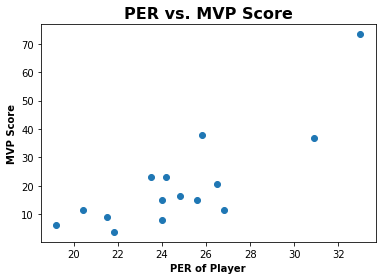

In [17]:
x = mvp['PER']
y = mvp['MVP Score']

plt.scatter(x, y)
plt.title('PER vs. MVP Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('PER of Player', fontdict={'fontweight':'bold'})
plt.ylabel('MVP Score', fontdict={'fontweight':'bold'})
plt.show()

In [18]:
#plt.savefig('PER vs. MVP Score.png')

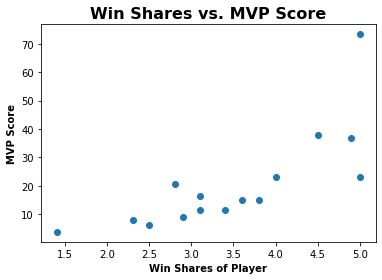

In [19]:
x = mvp['Win Shares']
y = mvp['MVP Score']

plt.scatter(x, y)
plt.title('Win Shares vs. MVP Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Win Shares of Player', fontdict={'fontweight':'bold'})
plt.ylabel('MVP Score', fontdict={'fontweight':'bold'})
plt.show()

In [20]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [21]:
mvp.set_index(['Player', 'Pos', 'Age', 'Tm', 'G', 'REB', 'AST', 'PTS', 'FG%', '3P%', 'PER', 'Win Shares', 'MVP Score'], inplace=True)
mvp

,,,,,,,,,,,,
Player,Pos,Age,Tm,G,REB,AST,PTS,FG%,3P%,PER,Win Shares,MVP Score
Nikola Jokić,C,26,DEN,26,13.5,7.2,25.9,0.575,0.365,33.0,5.0,73.31
Kevin Durant,PF,33,BRK,27,7.9,5.9,29.7,0.523,0.382,25.8,4.5,37.93
Giannis Antetokounmpo,PF,27,MIL,27,11.6,5.8,27.4,0.530,0.275,30.9,4.9,36.86
Stephen Curry,PG,33,GSW,31,5.3,5.9,27.9,0.435,0.399,24.2,5.0,23.24
Karl-Anthony Towns,C,26,MIN,30,9.1,3.6,24.5,0.510,0.426,23.5,4.0,22.99
Joel Embiid,C,27,PHI,21,10.8,4.2,25.0,0.447,0.375,26.5,2.8,20.67
LeBron James,SF,37,LAL,22,6.8,6.5,27.4,0.517,0.345,24.8,3.1,16.55
DeMar DeRozan,PF,32,CHI,26,5.2,4.2,26.8,0.500,0.333,24.0,3.8,15.15
Trae Young,PG,23,ATL,29,4.0,9.3,27.3,0.460,0.377,25.6,3.6,14.88


#### Exporting ####

###### MVP Table to CSV ######

In [22]:
import datetime

current_date = datetime.datetime.now()
filename = str(current_date.month)+"-"+str(current_date.day)+"-"+str(current_date.year)
output = mvp.to_csv(str("MVP " + filename))